# Simulating monodisperse PHAs - example scripts

This notebook will contain the same code as found in the **Simulating_Monodisperse_PHAs_Walkthrough.ipynb** with a step-by-step guide found here: https://polymersimulator.readthedocs.io/en/latest/simulating_phas.html

This notebook will show how to package up the the code found in the afforementioned notebook into a usable script and will cover:

- Building polymers from pre-parameterized polymer units
- Constructing systems for simulations
- Running simulations with these systems

All of the steps will, first, be discussed indiviudally and how steps like **building polymers**, **preparing systems** and **runnning simulations** can be carried out using python loops and expedite the process for many systems.
**However**, the last step in this notebook shows how to pipe everything together and it may be of interest to skip to this section if you are confident with using the code.

<div class="alert alert-block alert-info">
<b>Note:</b> Please refer to the walkthrough notebook for a detailed guide on how the code works.
</div>


## 1. Importing python modules

First we will import some python modules

In [1]:
from modules.sw_openmm import *
from modules.sw_directories import *
from modules.sw_build_systems import *
import os as os

## 2. Initialise manager and builder python objects

Now the filepath manager and class containing system bulding tools can be initialised.

In [2]:
manager = PolySimManage(os.getcwd())
builder = BuildAmberSystems(manager)

## 3. Script to build polymers

This script will pipe together a lot of functions seen in the previous notebook and will require 2 things:

- Name of base_trimer
- Desired length of polymer

This example will create a decamer of 3HB.

In [3]:
# Name the trimer base name and the number units the final polymer will include
prefix = "3HB"
trimer_base_name = f"{prefix}_trimer"
number_of_units = 10

# Build the polymer using the trimer_base_name and number_of_units
polymer = builder.gen_polymer_pdb_and_params(base_name=trimer_base_name, number_of_units=number_of_units)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_10_polymer.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_10_polymer.intleap
Loading Prep file: ./head_3HB_trimer.prepi
Loading Prep file: ./mainchain_3HB_trimer.prepi
Loading Prep file: ./tail_3HB_trimer.prepi
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 

## 3.1 Building multiple polymers at once

This methodology can easily implemented into a loop to build many polymers in one go.

For this example decamers of **4HB**, **3HV** and **3H4MeV** will be built in one go.

In [4]:
# Name the trimer base name and the number units the final polymer will include
prefixes = ["4HB", "3HV", "3H4MeV"]
number_of_units = 10

for prefix in prefixes:
    # Create trimer base name
    trimer_base_name = f"{prefix}_trimer"
    
    # Build the polymer using the trimer_base_name and number_of_units
    polymer = builder.gen_polymer_pdb_and_params(base_name=trimer_base_name, number_of_units=number_of_units)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/4HB_trimer
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 4HB_10_polymer.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./4HB_10_polymer.intleap
Loading Prep file: ./head_4HB_trimer.prepi
Loading Prep file: ./mainchain_4HB_trimer.prepi
Loading Prep file: ./tail_4HB_trimer.prepi
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 

## 4. Script to build systems - 1 type of polymer

This step is an example of how a few different methodologies can be piped together to build systems - this **assumes that the polymer has already been built**

To build polymer systems, all that is needed is a list of polymers and the number of each polymer that is wished to be packed. For this script a system of **25 3HB decamers** will be packed in the same manner as in the walkthrough notebook.

/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.top
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.gro
✅ Combined 1 files into /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.itp
 
            Return code: 0
            STDOUT: 
            
Setting the LD random seed to -101056867

Generated 36 of the 36 non-bonded parameter combinations

Generated 36 of the 36 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type '3HB_10_polymer'

Excluding 3 bonded neighbours molecule type '3HB_10_polymer'
Analysing residue names:
There are:   250      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 32x32x32, spacing 0.114 0.114 0.114

Estimate for the relative computational load of the PME mesh part: 0.19

This run wil

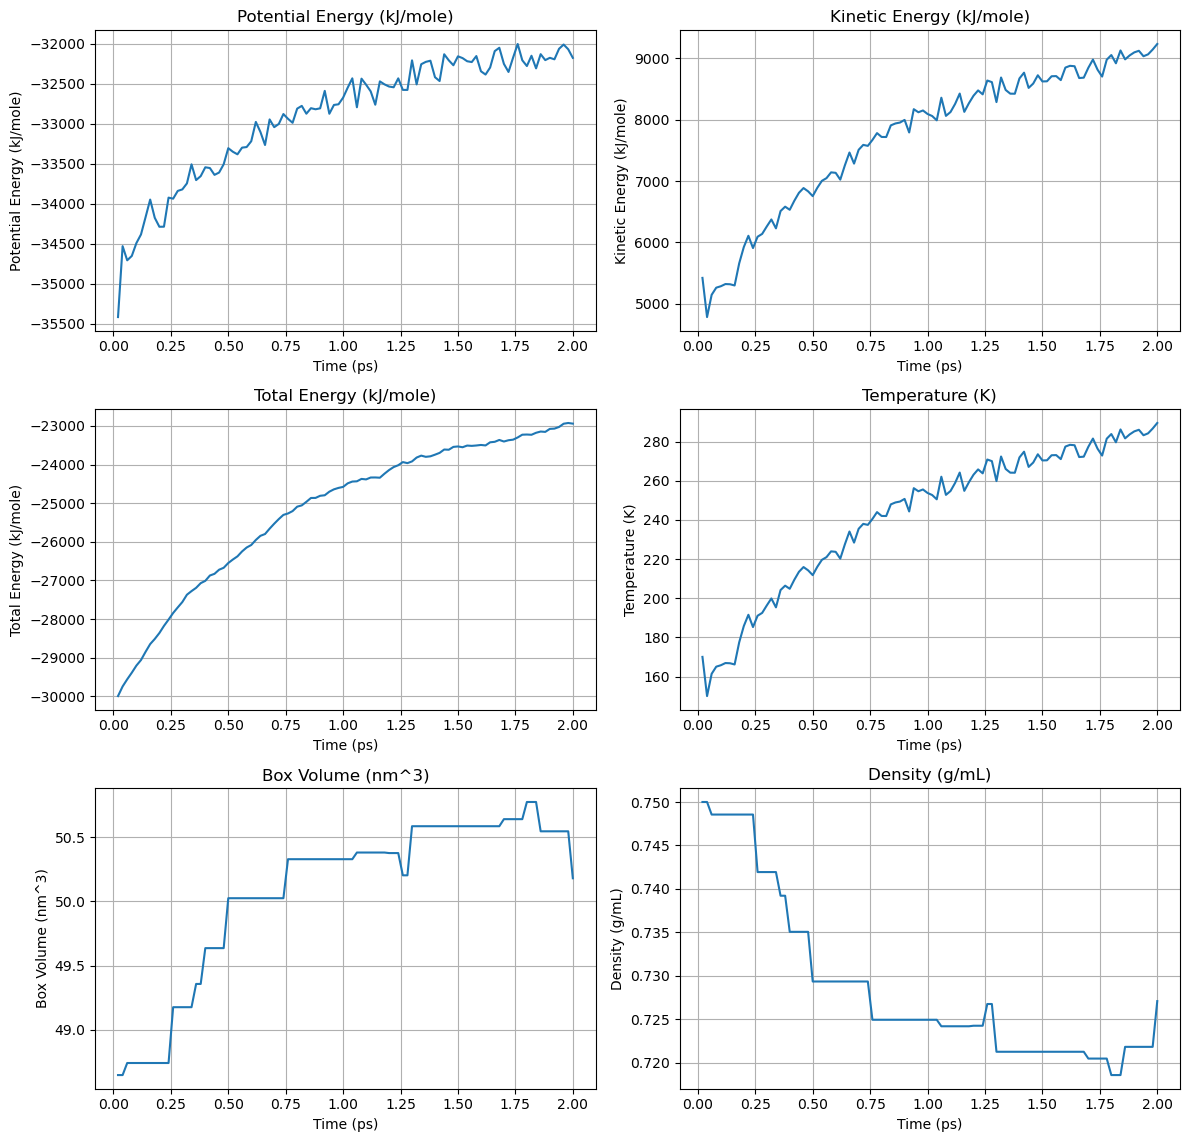

Starting system found in 9 attempts


In [5]:
# Define list containing 1 polymer and amount of that polymer
polymer_names = ["3HB_10_polymer"]
number_of_polymers = [25]

# Retrieve amber files
amb_top, amb_coord = manager.load_amber_filepaths(polymer_names[0])

# Convert to gromacs format
builder.run_acpype(name=polymer_names[0], top=amb_top, coord=amb_coord)

# Build polyply system
system_name, gro_top, gro_coord, gro_itp = builder.find_polyply_starting_structure(polymer_names=polymer_names, num_poly=number_of_polymers, dens=750, max_attempts=100)

This will return the **system_name** variable that can be passed to simulation methodology outlined further on.

## 5. Script to build systems - multiple types of polymer

The input for this is the same, except more polymers will be defined in the list. These will be the three decamers built earlier on in this notebook; **3HV**, **4HB** and **3H4MeV**.

Again, **this assumes the polymers have alreafy been built**.

In [ ]:
# Define list containing 1 polymer and amount of that polymer
polymer_names = ["3HV_10_polymer", "4HB_10_polymer", "3H4MeV_10_polymer"]
number_of_polymers = [10, 10, 10]

for polymer in polymer_names:
    # Retrieve amber files
    amb_top, amb_coord = manager.load_amber_filepaths(polymer_names[i])

    # Convert to GROMACS format
    builder.run_acpype(name=polymer_names[i], top=amb_top, coord=amb_coord)

# Build polyply system
system_name, gro_top, gro_coord, gro_itp = builder.find_polyply_starting_structure(polymer_names=polymer_names, num_poly=number_of_polymers, dens=750, max_attempts=100)

# 6. Running a simulation

Two different systems have been generated so far:

- A system of 25 3HB decamers
- A system of 10 4HB decamer, 10 3HV decamers, 10 3H4MeV decamers

A test script for a simulation will be shown for the second system and the files required for simulation can be loaded easily for this with the **system_name** variable.

The simulation protocol is the same as shown in the walkthrough notebook:

- Short NPT density equilibration: this is the ensure the system reaches the correct density
- A singular NVT annealing cycle: Ensure any bias is removed from the initial structure
- Thermal ramping production run in NPT: This is the final run that is intended to find the the glass transition temperatur of the polymer system

A **while loop** is also implemented here to avoid any NaN errors that sometimes result after energy minimization - something that is explained in more detail in the walkthough notebook.

In [ ]:
# Load gromacs topology and coordinates
gro_top, gro_coord = manager.load_gromacs_filepaths(system_name)

# While loop ensures no NaN errors are hit (at least at the beggining of the simulations)
success = False
while not success:
    try: 
        # Intialise simulation
        sim = GromacsSimulation(manager, gro_top, gro_coord)

        # Minimize the energy in the system
        min_sim = sim.minimize_energy()

        # Set total steps (2fs timestep)
        sim.set_total_steps(10000)

        # Run a simple NPT simulation
        npt_sim, npt_sim_data = sim.basic_NPT(min_sim)

        # Update success flag
        success = True
    except Exception as e:
        # Restart the initialisation step if NaN error was encountered
        print(f"""Restarting simulation, minimized eometry imposing too many forces..
    
        The error is printed below:
    
        {e}""")

# Visaulise data from the npt sim
sim.graph_state_data(npt_sim_data)

# Set annealing parameters
sim.set_anneal_parameters([300, 600, 1, 10, 10000])

# Anneal the simulation
annealed_sim, annealed_sim_data = sim.anneal_NVT(npt_sim)

# Visualise data from annealing
sim.graph_state_data(annealed_sim_data)

# Heat the simulation
heated_sim, heated_sim_data = sim.thermal_ramp(annealed_sim, heating=True, quench_rate=10, ensemble="NPT", start_temp=300, max_temp=600, total_steps=10000)

# Visaulise the data from the heating stage
sim.graph_state_data(heated_sim_data)

## 6. Putting it all together

Now some scripts for individual steps have been shown, lets put it all together into one cell.

Here, 3 lists are defined:

- Prefixes of the polymers
- length of those polymers
- number of each polymer

<div class="alert alert-block alert-info">
<b>Note:</b> This is the most important part of this notebook, it details how to run simulations with simple inputs that allow you to control the type, number and length of polymers packed into a system. The script can be editted with relative ease to change the simulation protocol.
</div>

Current directory: /home/dan/polymersimulator/pdb_files/molecules/4HB_trimer
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 4HB_10_polymer.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./4HB_10_polymer.intleap
Loading Prep file: ./head_4HB_trimer.prepi
Loading Prep file: ./mainchain_4HB_trimer.prepi
Loading Prep file: ./tail_4HB_trimer.prepi
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 

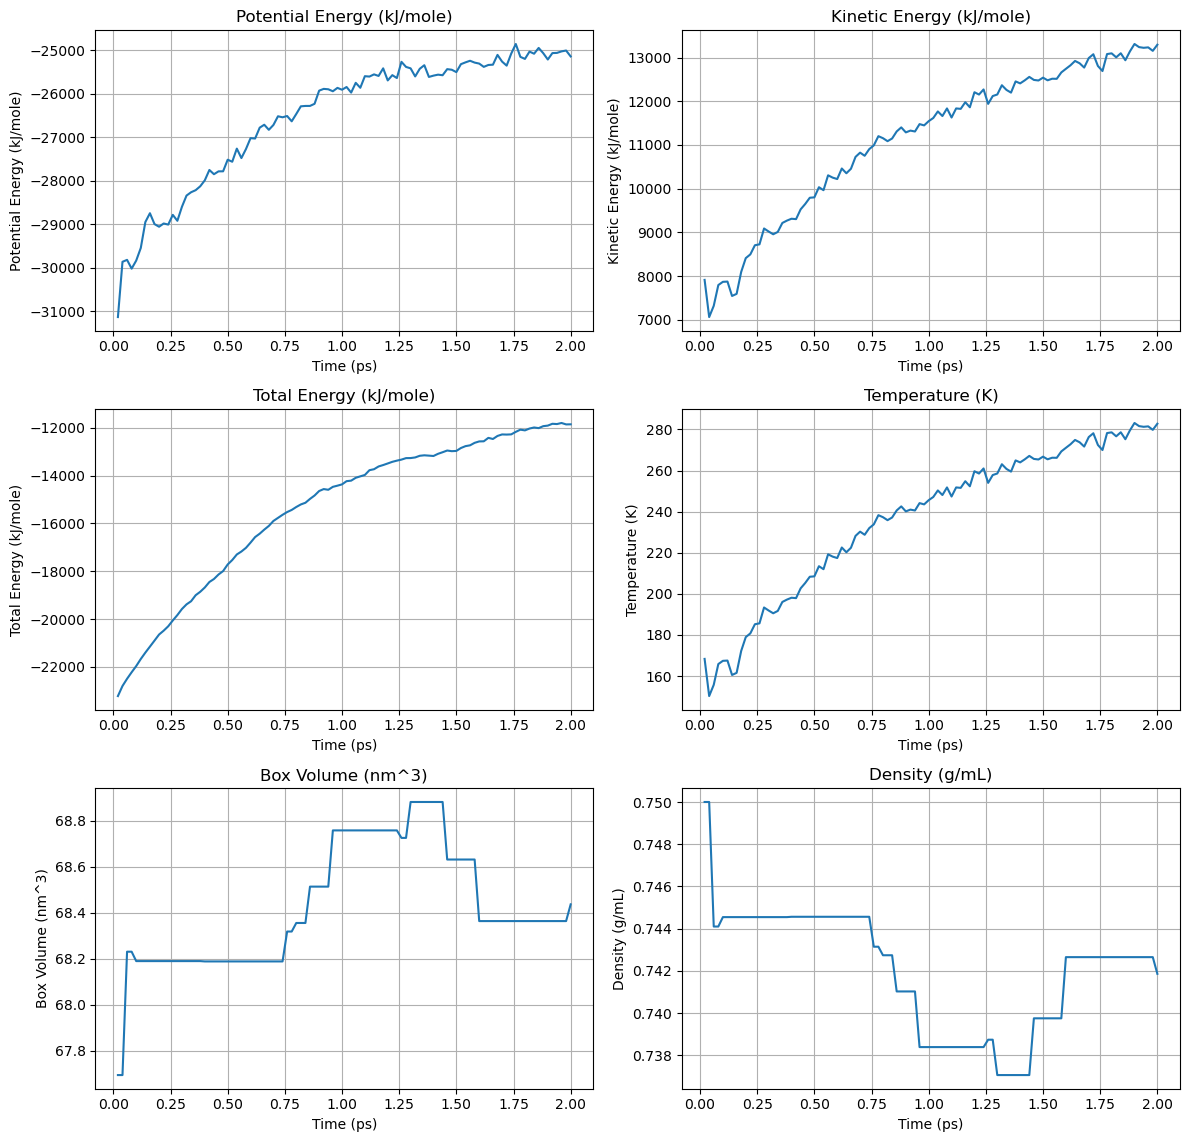

Starting system found in 1 attempts
Atoms in GRO: 4590
Atoms in TOP: 4590
Total steps for simulation set to:  10000
Basic npt information
                - Total steps: 10000
                - Total simulation time: 20000 fs
                - Temperature: 300 K
                - Pressure: 1 atm
                
Restarting simulation, minimized eometry imposing too many forces..
    
        The error is printed below:
    
        Particle coordinate is NaN.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#nan
Atoms in GRO: 4590
Atoms in TOP: 4590
Total steps for simulation set to:  10000
Basic npt information
                - Total steps: 10000
                - Total simulation time: 20000 fs
                - Temperature: 300 K
                - Pressure: 1 atm
                
Restarting simulation, minimized eometry imposing too many forces..
    
        The error is printed below:
    
        Particle coordinate is NaN.  For more info

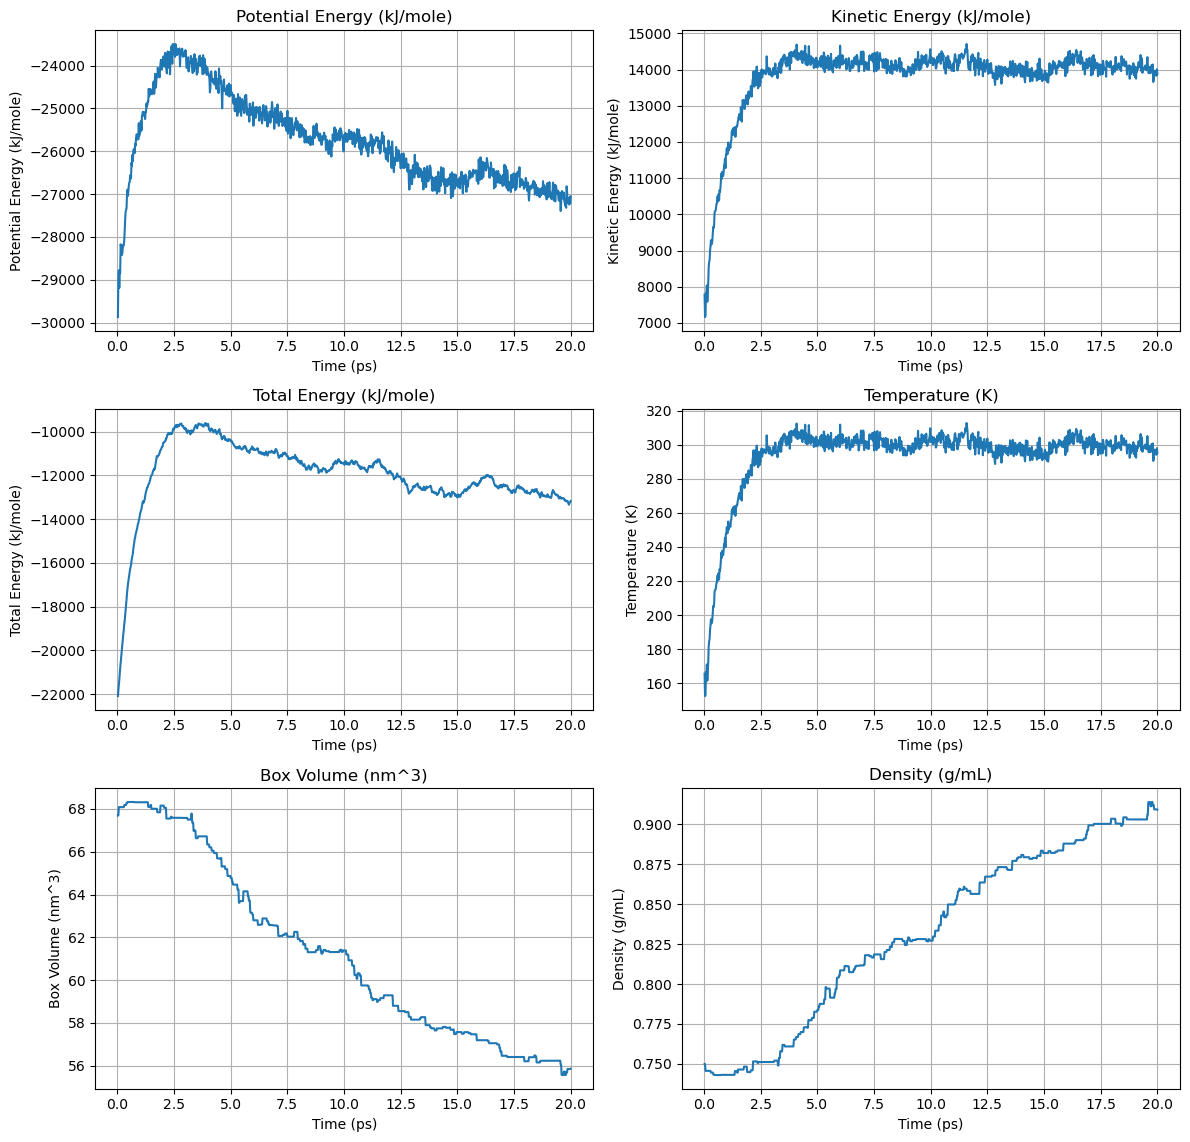

Anneal parameters set.
Starting temperature is:  300
Target temperature is:  600
Number of annealing cycles is:  1
The quench rate is:  10
The number of steps per cycle is:  10000
Annealing information:
                 - Number of heating/cooling increments: 30
                 - Steps per temperature in-/decrease: 4000
                 - Holding steps at 600 k: 1000
                 - Steps at heating/cooling increment: 133
                 - Total simulation time 20000 fs
                    


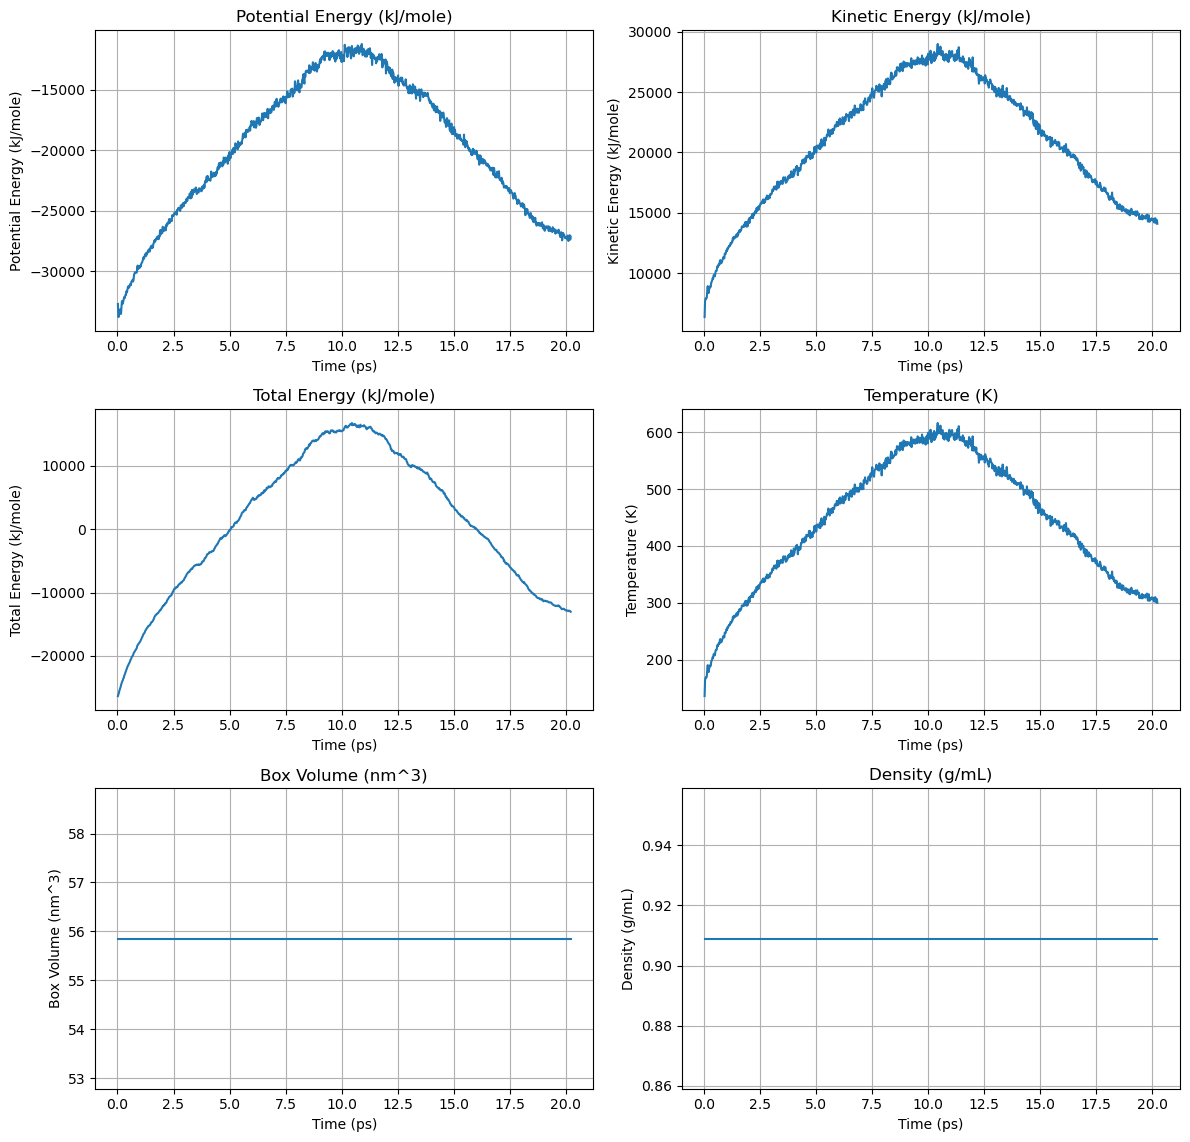

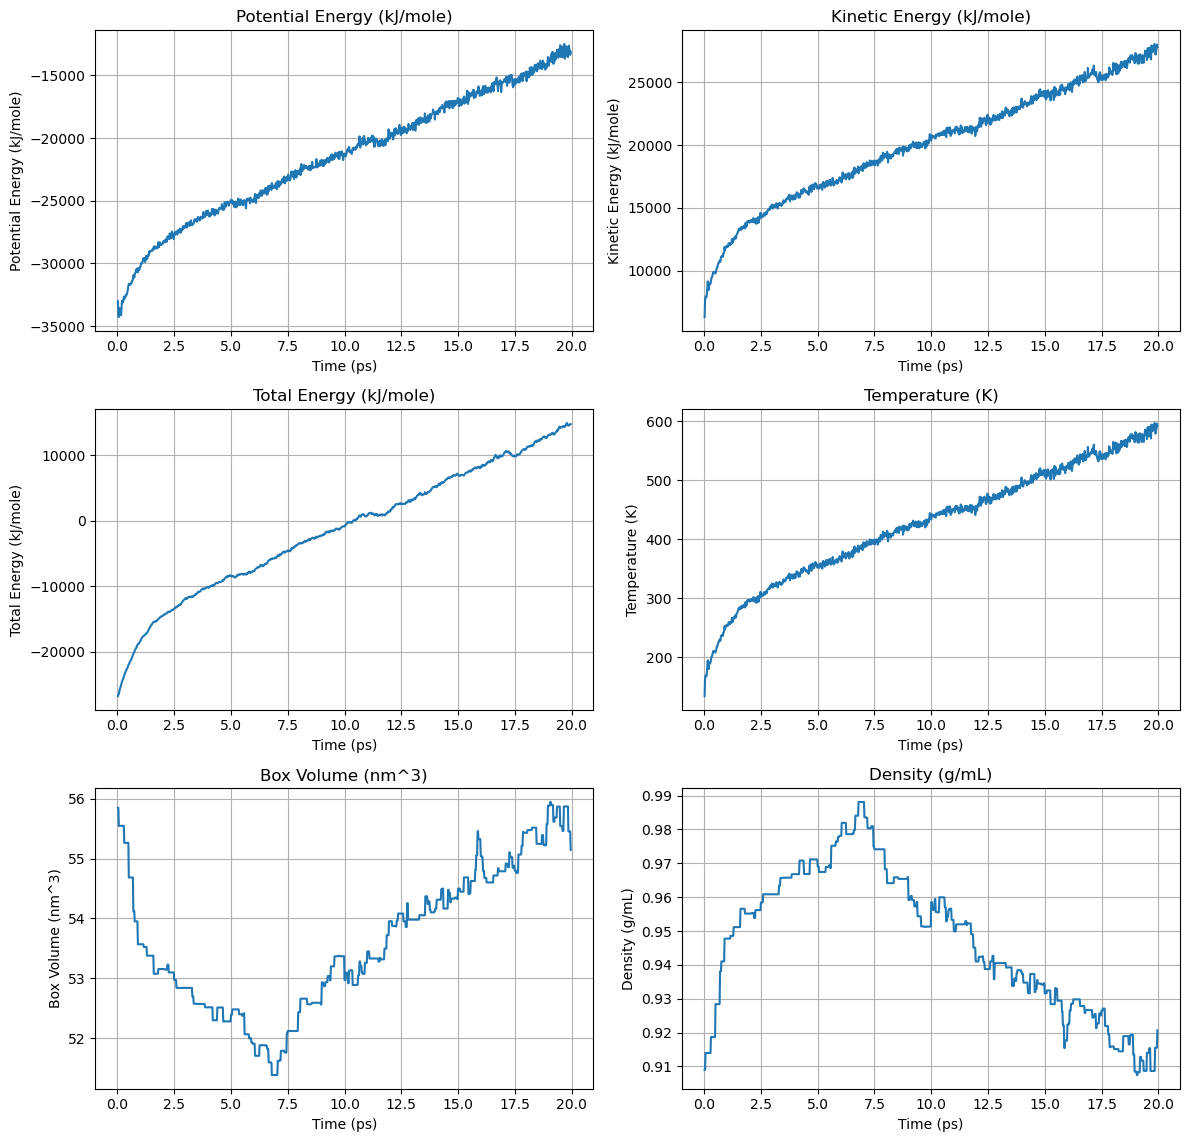

In [1]:
from modules.sw_openmm import *
from modules.sw_directories import *
from modules.sw_build_systems import *
import os as os

manager = PolySimManage(os.getcwd())
builder = BuildAmberSystems(manager)

# Name the trimer base name and the number units the final polymer will include
prefixes = ["4HB", "3HV", "3H4MeV"]
number_of_units = [10, 10, 10]
number_of_polymers = [10, 10, 10]

polymer_names = []

for i in range(len(prefixes)):
    # Create trimer base name
    trimer_base_name = f"{prefixes[i]}_trimer"
    
    # Build the polymer using the trimer_base_name and number_of_units
    polymer = builder.gen_polymer_pdb_and_params(base_name=trimer_base_name, number_of_units=number_of_units[i])

    # Create polymer names list
    polymer_names.append(f"{prefixes[i]}_{number_of_units[i]}_polymer")

for polymer in polymer_names:
    # Retrieve amber files
    amb_top, amb_coord = manager.load_amber_filepaths(polymer_names[i])

    # Convert to GROMACS format
    builder.run_acpype(name=polymer_names[i], top=amb_top, coord=amb_coord)

# Build polyply system
system_name, gro_top, gro_coord, gro_itp = builder.find_polyply_starting_structure(polymer_names=polymer_names, num_poly=number_of_polymers, dens=750, max_attempts=100)

# Load gromacs topology and coordinates
gro_top, gro_coord = manager.load_gromacs_filepaths(system_name)

success = False
while not success:
    try: 
        # Intialise simulation
        sim = GromacsSimulation(manager, gro_top, gro_coord)

        # Minimize the energy in the system
        min_sim = sim.minimize_energy()

        # Set total steps (2fs timestep)
        sim.set_total_steps(10000)

        # Run a simple NPT simulation
        npt_sim, npt_sim_data = sim.basic_NPT(min_sim)

        # Update success flag
        success = True
    except Exception as e:
        print(f"""Restarting simulation, minimized eometry imposing too many forces..
    
        The error is printed below:
    
        {e}""")

# Visaulise data from the npt sim
sim.graph_state_data(npt_sim_data)

# Set annealing parameters
sim.set_anneal_parameters([300, 600, 1, 10, 10000])

# Anneal the simulation
annealed_sim, annealed_sim_data = sim.anneal_NVT(npt_sim)

# Visualise data from annealing
sim.graph_state_data(annealed_sim_data)

# Heat the simulation
heated_sim, heated_sim_data = sim.thermal_ramp(annealed_sim, heating=True, quench_rate=10, ensemble="NPT", start_temp=300, max_temp=600, total_steps=10000)

# Visaulise the data from the heating stage
sim.graph_state_data(heated_sim_data)